# Time series decomposition

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Month'>

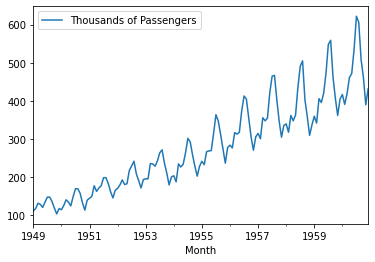

In [10]:
# import and visualize data
data_set = pd.read_csv('airline_passengers.csv',infer_datetime_format=True,parse_dates=["Month"],index_col=["Month"])
data_set.plot()

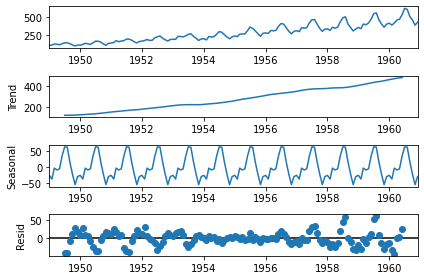

In [11]:
# decompose with additive model (seasonal, trend and resid)
import statsmodels.api as sm
add_decomposition = sm.tsa.seasonal_decompose(data_set, model = 'additive')
x = add_decomposition.plot()

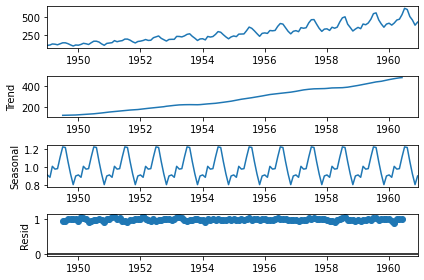

In [12]:
mul_decomposition = sm.tsa.seasonal_decompose(data_set, model = 'multiplicative')
x = mul_decomposition.plot()


# Stationarity

<AxesSubplot:title={'center':'Thousands of Passengers'}>

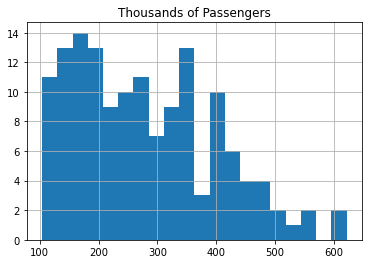

In [13]:
# plot distribution of values
data_set.hist(bins=20)[0][0]

<AxesSubplot:>

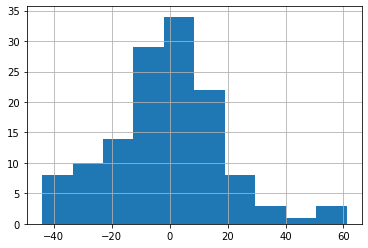

In [14]:
# plot distribution of data without trend and seasonality
add_decomposition.resid.hist()

<AxesSubplot:>

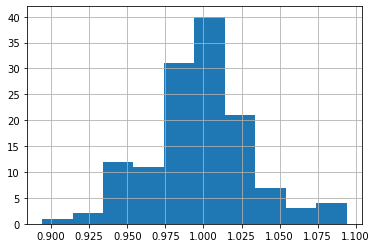

In [15]:
# plot distribution of data without trend and seasonality
mul_decomposition.resid.hist()

In [16]:
data_set.mean()[0]

280.2986111111111

In [17]:
from math import sqrt
# check if mean and variance of the dataset are constant
n = int(add_decomposition.resid.shape[0]/2)
print("mean of the entire dataset {:0.2f}, the first half {:0.2f}, and the second half {:0.2f}".format(data_set.mean()[0], data_set[:n].mean()[0], data_set[n:].mean()[0]))
print("std-dev of the entire dataset {:0.2f}, the first half {:0.2f}, and the second half {:0.2f}".format(sqrt(data_set.var()[0]), sqrt(data_set[:n].var()[0]), sqrt(data_set[n:].var()[0])))



mean of the entire dataset 280.30, the first half 182.90, and the second half 377.69
std-dev of the entire dataset 119.97, the first half 47.70, and the second half 86.44


In [18]:
# check if mean and variance of the residual off the additive decomposizion are constant
print("mean of the entire dataset {:0.2f}, the first half {:0.2f}, and the second half {:0.2f}".format(add_decomposition.resid.mean(), add_decomposition.resid[:n].mean(), add_decomposition.resid[n:].mean()))
print("std-dev of the entire dataset {:0.2f}, the first half {:0.2f}, and the second half {:0.2f}".format(sqrt(add_decomposition.resid.var()), sqrt(add_decomposition.resid[:n].var()), sqrt(add_decomposition.resid[n:].var())))



mean of the entire dataset -0.75, the first half -0.82, and the second half -0.68
std-dev of the entire dataset 19.34, the first half 17.99, and the second half 20.74


In [19]:
# check if mean and variance of the residual off the multiplicative decomposizion are constant
print("mean of the entire dataset {:0.2f}, the first half {:0.2f}, and the second half {:0.2f}".format(mul_decomposition.resid.mean(), mul_decomposition.resid[:n].mean(), mul_decomposition.resid[n:].mean()))
print("std-dev of the entire dataset {:0.3f}, the first half {:0.3f}, and the second half {:0.3f}".format(sqrt(mul_decomposition.resid.var()), sqrt(mul_decomposition.resid[:n].var()), sqrt(mul_decomposition.resid[n:].var())))

mean of the entire dataset 1.00, the first half 1.00, and the second half 1.00
std-dev of the entire dataset 0.033, the first half 0.037, and the second half 0.029


In [24]:
from statsmodels.tsa.stattools import adfuller, kpss

df = add_decomposition.resid.dropna()

# ADF Test
# where the null hypothesis is the time series possesses a unit root and is non-stationary. 
# So, if the P-Value in ADH test is less than the significance level (0.05), you reject the null hypothesis. 

result = adfuller(df, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

ADF Statistic: -5.298427587050729
p-value: 5.516868902226369e-06
Critical Values:
   1%, -3.4870216863700767
Critical Values:
   5%, -2.8863625166643136
Critical Values:
   10%, -2.580009026141913


In [25]:
# KPSS Test
# The KPSS test is used to test for trend stationarity. 
# The null hypothesis and the P-Value interpretation is just the opposite of ADH test.
result = kpss(df, regression='c', nlags=None)
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critical Values:')
    print(f'   {key}, {value}')


KPSS Statistic: 0.106699
p-value: 0.100000
Critical Values:
   10%, 0.347
Critical Values:
   5%, 0.463
Critical Values:
   2.5%, 0.574
Critical Values:
   1%, 0.739


/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [26]:
df = mul_decomposition.resid.dropna()

# ADF Test
# where the null hypothesis is the time series possesses a unit root and is non-stationary. 
# So, id the P-Value in ADH test is less than the significance level (0.05), you reject the null hypothesis. )

result = adfuller(df, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

ADF Statistic: -7.415924640885228
p-value: 6.936028992598772e-11
Critical Values:
   1%, -3.484219653271961
Critical Values:
   5%, -2.885145235641637
Critical Values:
   10%, -2.579359138917794


In [27]:
# KPSS Test
# The KPSS test is used to test for trend stationarity. 
# The null hypothesis and the P-Value interpretation is just the opposite of ADH test.
result = kpss(df, regression='c', nlags=None)
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critical Values:')
    print(f'   {key}, {value}')


KPSS Statistic: 0.126103
p-value: 0.100000
Critical Values:
   10%, 0.347
Critical Values:
   5%, 0.463
Critical Values:
   2.5%, 0.574
Critical Values:
   1%, 0.739


/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

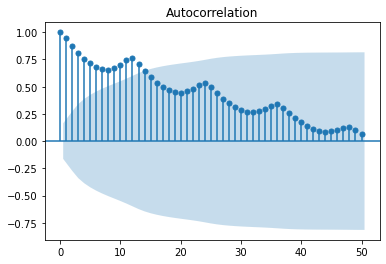

In [12]:
x = plot_acf(data_set, lags=50)

/opt/conda/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


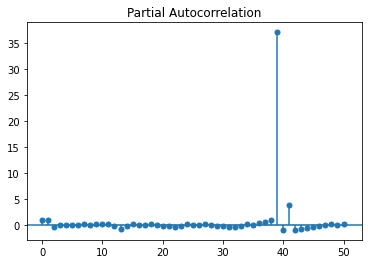

In [13]:
x = plot_pacf(data_set, lags=50)

/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


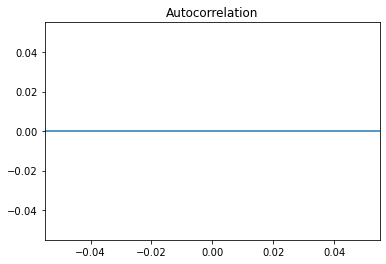

In [14]:
x = plot_acf(add_decomposition.resid)

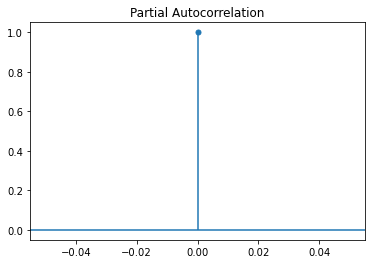

In [15]:
x = plot_pacf(add_decomposition.resid)

/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


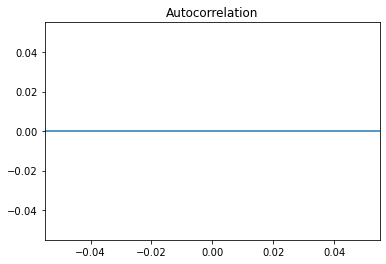

In [16]:
x = plot_acf(mul_decomposition.resid)

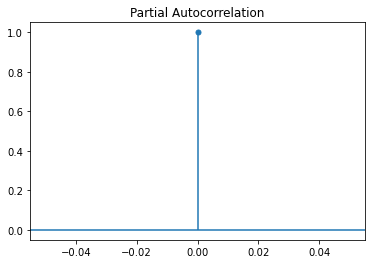

In [17]:
x = plot_pacf(mul_decomposition.resid)